# Integrating PBMC data using SCALEX

The following tutorial demonstrates how to use SCALEX for *integrating* PBMC data. 

There are two parts of this tutorial:

* **Seeing the batch effect.** This part will show the batch effects of two PBMC datasets from single cell 3' and 5’ gene expression libraries that used in SCALEX manuscript.
* **Integrating data using SCALEX.** This part will show you how to perform batch correction using [SCALEX](https://scalex.readthedocs.io/en/latest/api/scalex.SCALEX.html#scalex.SCALEX) function in SCALEX.

In [1]:
import scalex
from scalex.function import SCALEX
from scalex.plot import embedding
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sc.settings.verbosity = 3             
sc.settings.set_figure_params(dpi=80, facecolor='white',figsize=(3,3),frameon=True)
sc.logging.print_header()
plt.rcParams['axes.unicode_minus']=False

scanpy==1.6.1 anndata==0.7.5 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
sns.__version__

'0.10.1'

In [4]:
scalex.__version__

'0.2.0'

## Integrating data using SCALEX

The batch effects can be well-resolved using SCALEX.

<div class="alert alert-info">

**Note**

Here we use GPU to speed up the calculation process, however, you can get the same level of performance only using cpu.    

</div>  

In [12]:
# ! wget http://zhanglab.net/scalex-tutorial/pbmc.h5ad
adata=SCALEX('pbmc.h5ad', batch_name='batch', outdir='pbmc_output/')

2021-03-30 20:16:38,586 - root - INFO - Raw dataset shape: (15476, 33694)
2021-03-30 20:16:38,588 - root - INFO - Preprocessing
2021-03-30 20:16:38,616 - root - INFO - Filtering cells
Trying to set attribute `.obs` of view, copying.
2021-03-30 20:16:39,462 - root - INFO - Filtering features


filtered out 13316 genes that are detected in less than 3 cells


2021-03-30 20:16:39,952 - root - INFO - Normalizing total per cell


normalizing counts per cell
    finished (0:00:00)


2021-03-30 20:16:40,076 - root - INFO - Log1p transforming
2021-03-30 20:16:40,493 - root - INFO - Finding variable features


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


2021-03-30 20:16:42,776 - root - INFO - Batch specific maxabs scaling
2021-03-30 20:16:44,173 - root - INFO - Processed dataset shape: (15476, 2000)
2021-03-30 20:16:44,192 - root - INFO - model
VAE(
  (encoder): Encoder(
    (enc): NN(
      (net): ModuleList(
        (0): Block(
          (fc): Linear(in_features=2000, out_features=1024, bias=True)
          (norm): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): ReLU()
        )
      )
    )
    (mu_enc): NN(
      (net): ModuleList(
        (0): Block(
          (fc): Linear(in_features=1024, out_features=10, bias=True)
        )
      )
    )
    (var_enc): NN(
      (net): ModuleList(
        (0): Block(
          (fc): Linear(in_features=1024, out_features=10, bias=True)
        )
      )
    )
  )
  (decoder): NN(
    (net): ModuleList(
      (0): Block(
        (fc): Linear(in_features=10, out_features=2000, bias=True)
        (norm): DSBatchNorm(
          (bns): ModuleList(

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


In [13]:
adata

AnnData object with n_obs × n_vars = 15476 × 2000
    obs: 'batch', 'celltype', 'protocol', 'celltype0', 'n_genes', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'leiden', 'batch_colors', 'celltype_colors', 'leiden_colors'
    obsm: 'latent', 'X_umap'
    obsp: 'distances', 'connectivities'

While there seems to be some strong batch-effect in all cell types, SCALEX can integrate them homogeneously.

In [14]:
sc.settings.set_figure_params(dpi=80, facecolor='white',figsize=(3,3),frameon=True)

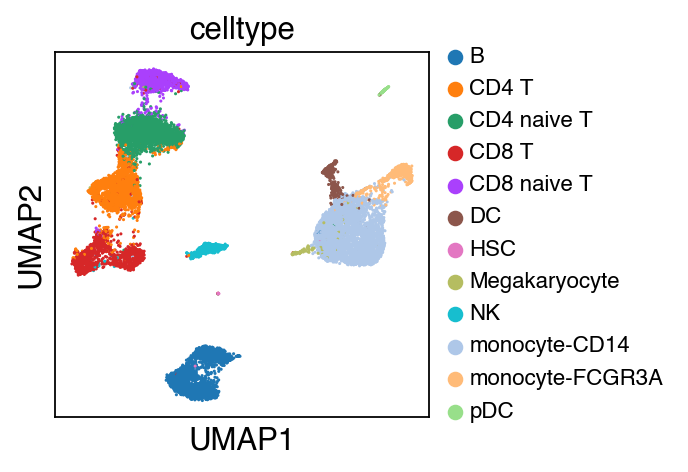

In [15]:
sc.pl.umap(adata,color=['celltype'],legend_fontsize=10)

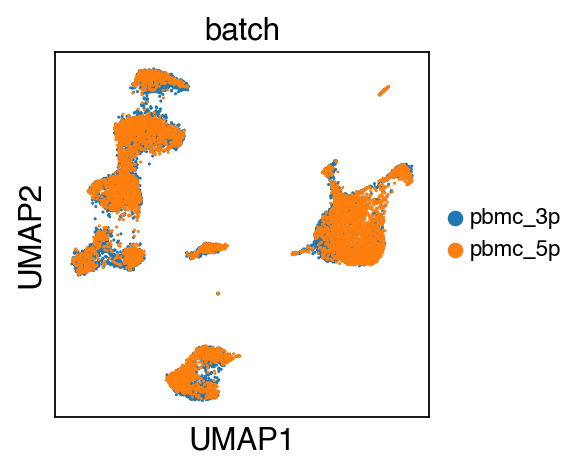

In [16]:
sc.pl.umap(adata,color=['batch'],legend_fontsize=10)

The integrated data is stored as `adata.h5ad` in the output directory assigned by `outdir` parameter in [SCALEX](https://scalex.readthedocs.io/en/latest/api/scale.SCALEX.html#scalex.SCALEX) function. 